### Урок 8. Работа с данными

In [2]:
import pandas as pd

### Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
- Загрузите датасет в pandas DataFrame под названием df.

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Выполните предварительную обработку данных, выполнив следующие шаги: 
- Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать 
  (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). 

In [4]:
f"Всего строк: {df.shape[0]} и {df.shape[1]} признаков"

'Всего строк: 1460 и 81 признаков'

In [5]:
pd.DataFrame(data = [df.isnull().sum()/df.shape[0]*100], index=['missed (%)']).T.style.background_gradient(cmap='Wistia')

,missed (%)
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
Alley,93.767123
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000


In [6]:
df[ df['YearBuilt'] != df['GarageYrBlt']][['YearBuilt', 'GarageYrBlt']]

,YearBuilt,GarageYrBlt
3,1915,1998.0
15,1929,1991.0
26,1951,2005.0
27,2007,2008.0
29,1927,1920.0
...,...,...
1445,1966,1990.0
1448,1910,1950.0
1449,1970,NaN
1450,1974,NaN


In [7]:
# Удаление столбцов, где отсутствует более 50% данных
na_cells = df.isna().sum()
for ind in na_cells.index:
    if na_cells[ind]/df.shape[0] > 0.3:
        df = df.drop(ind, axis=1)
        print(f"Признак {ind} с {na_cells[ind]} пустых значений удален")
       

Признак Alley с 1369 пустых значений удален
Признак MasVnrType с 872 пустых значений удален
Признак FireplaceQu с 690 пустых значений удален
Признак PoolQC с 1453 пустых значений удален
Признак Fence с 1179 пустых значений удален
Признак MiscFeature с 1406 пустых значений удален


In [8]:
# В столбцах, где отсутсет 5 b менее значений, удаляем строки с этими значениями
na_cells = df.isna().sum()
for ind in na_cells.index:
    if na_cells[ind] in range(1, 6):
        df = df.dropna(subset=ind)

In [9]:
# Оставшиеся признаки с пустыми значениями.

na_cells = df.isna().sum()
for ind in na_cells.index:
    if na_cells[ind] != 0:
        print(ind, na_cells[ind], df[ind].dtypes)



LotFrontage 259 float64
MasVnrArea 8 float64
BsmtQual 37 object
BsmtCond 37 object
BsmtExposure 38 object
BsmtFinType1 37 object
BsmtFinType2 38 object
GarageType 81 object
GarageYrBlt 81 float64
GarageFinish 81 object
GarageQual 81 object
GarageCond 81 object


In [10]:
# Заполнение пропущенных значений в столбцах с количественными данными средним значением
mean_lot_frontage = df['LotFrontage'].mean()
df['LotFrontage'] = df['LotFrontage'].fillna(mean_lot_frontage)

mean_mas_vnrArea = df['MasVnrArea'].mean()
df['MasVnrArea'] = df['MasVnrArea'].fillna(mean_mas_vnrArea)


# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# df[["GarageYrBlt"]] = imputer.fit_transform(df[["GarageYrBlt"]])

# Данных с пропусками в годе постройки гаража немного, заменим значение на год постройки сомого здания

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])



In [11]:
# Заполнение пропущенных значений в столбцах с категориальными данными наиболее частым значением
mode_bsmt_qual = df['BsmtQual'].mode()[0]
df['BsmtQual'] = df['BsmtQual'].fillna(mode_bsmt_qual)

mode_bsmt_cond = df['BsmtCond'].mode()[0]
df['BsmtCond'] = df['BsmtCond'].fillna(mode_bsmt_cond)

mode_bsmt_explosure= df['BsmtExposure'].mode()[0]
df['BsmtExposure'] = df['BsmtExposure'].fillna(mode_bsmt_explosure)

mode_bsmt_fin_type1= df['BsmtFinType1'].mode()[0]
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(mode_bsmt_fin_type1)

mode_bsmt_fin_type2= df['BsmtFinType2'].mode()[0]
df['BsmtFinType2']= df['BsmtFinType2'].fillna(mode_bsmt_fin_type2)


# Данные о гаражах в постройках сохраним, только добавим значение NaN на категориальное значение 'No Garage'

df['GarageType'] = df['GarageType'].fillna('No Garage')

df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')

df['GarageQual'] = df['GarageQual'].fillna('No Garage')

df['GarageCond'] = df['GarageCond'].fillna('No Garage')


In [12]:
# Проверка заполненного датасета
pd.DataFrame(data = [df.isnull().sum()/df.shape[0]*100], index=['missed (%)'], ).T.style.background_gradient(cmap='Wistia')

,missed (%)
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,0.000000
LotArea,0.000000
Street,0.000000
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000
LotConfig,0.000000


* Проверьте и обработайте любые дублирующиеся строки в датасете.

In [13]:

print(f"В датасете {df.duplicated().sum()} дубликатов")

В датасете 0 дубликатов


* Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [14]:
pd.set_option('display.max_rows', None)
pd.DataFrame(data=[df.columns, df.iloc[0], df.dtypes], index = ['column', 'example', 'type']).T


,column,example,type
0,Id,1,int64
1,MSSubClass,60,int64
2,MSZoning,RL,object
3,LotFrontage,65.0,float64
4,LotArea,8450,int64
5,Street,Pave,object
6,LotShape,Reg,object
7,LandContour,Lvl,object
8,Utilities,AllPub,object
9,LotConfig,Inside,object


In [15]:
# Преобразование года постройки гаража GarageYrBlt к типу int
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

### Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: 
* Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы?

Text(0, 0.5, 'Количество')

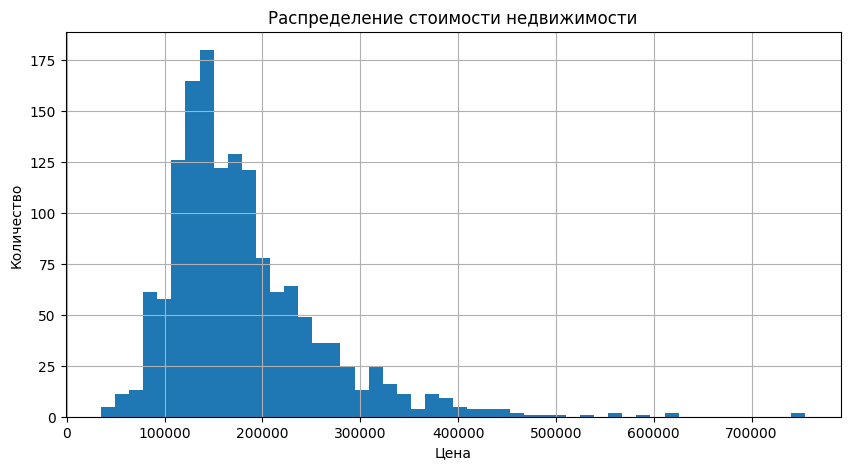

In [16]:
import matplotlib.pyplot as plt
df['SalePrice'].hist(bins=50, figsize=(10,5))
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество')

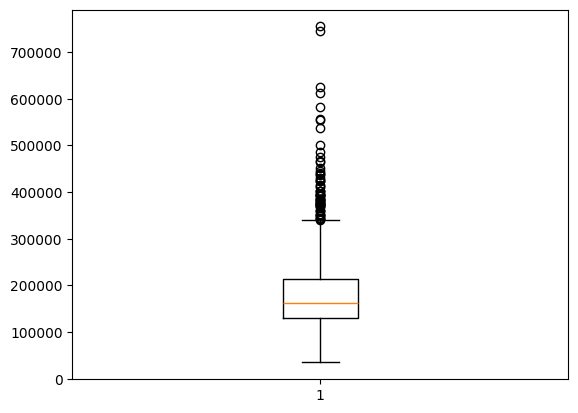

In [17]:
plt.boxplot(df['SalePrice'])
plt.show()

Построек стомостью выше 40000 незначительное количество, заменим эти выбромы на медианное значение

In [18]:

from scipy import stats

z_score = stats.zscore(df["SalePrice"])
treshold = 3
median_sale_price = df['SalePrice'].median()
df.loc[z_score > treshold, 'SalePrice'] = median_sale_price


Text(0, 0.5, 'Количество')

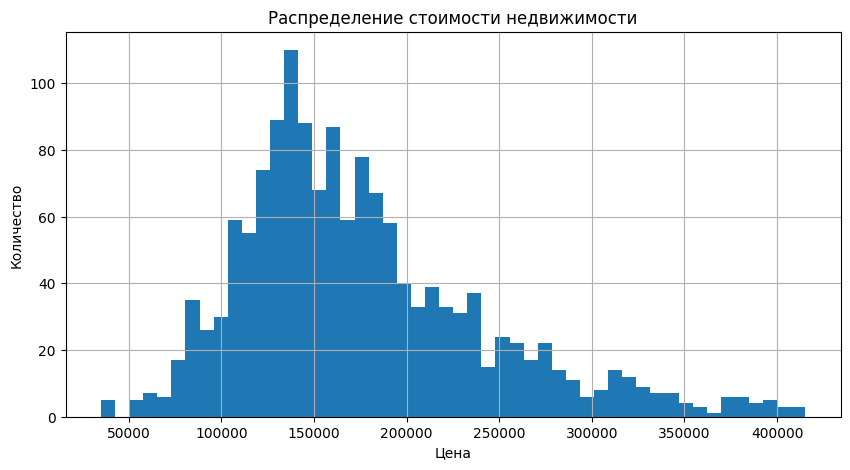

In [19]:
df['SalePrice'].hist(bins=50, figsize=(10,5))
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество')

Распределение приняло более нормальный вид

* Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? 



OverallQual     0.755815
YearBuilt       0.548660
YearRemodAdd    0.530438
TotalBsmtSF     0.548416
1stFlrSF        0.538631
GrLivArea       0.619592
FullBath        0.534416
GarageYrBlt     0.523191
GarageCars      0.633343
GarageArea      0.604202
Name: SalePrice, dtype: float64


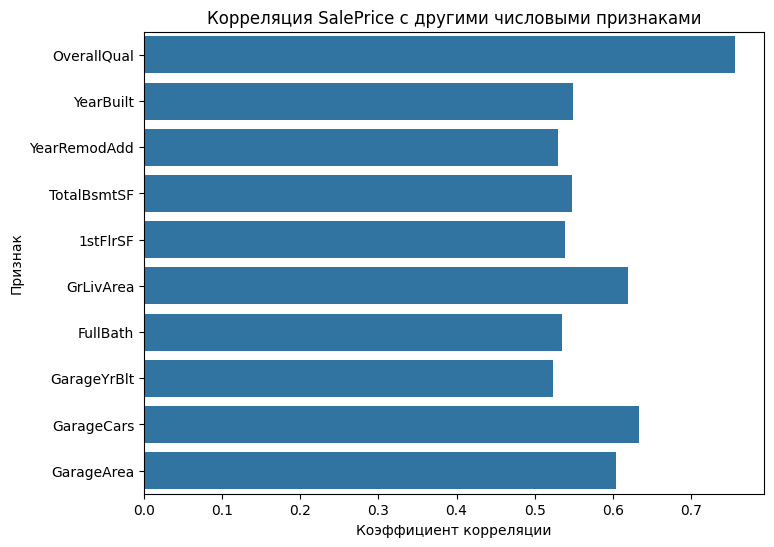

In [20]:
import seaborn as sns

correlations = df.corr(numeric_only=True)['SalePrice']

# Отфильтровать выбранный признак (сам с собой коррелирует на 1)
correlations = correlations.drop('SalePrice')
correlations = correlations[correlations.abs() > 0.5]

# Вывести результаты
print(correlations)

# Визуализировать корреляции
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel('Коэффициент корреляции')
plt.ylabel('Признак')
plt.title('Корреляция SalePrice с другими числовыми признаками')
plt.show()


Значительнее всего стомиость недвижимости зависит от общего качества постройки, жилой площади и вместимости гаража.

* Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. 

<Axes: >

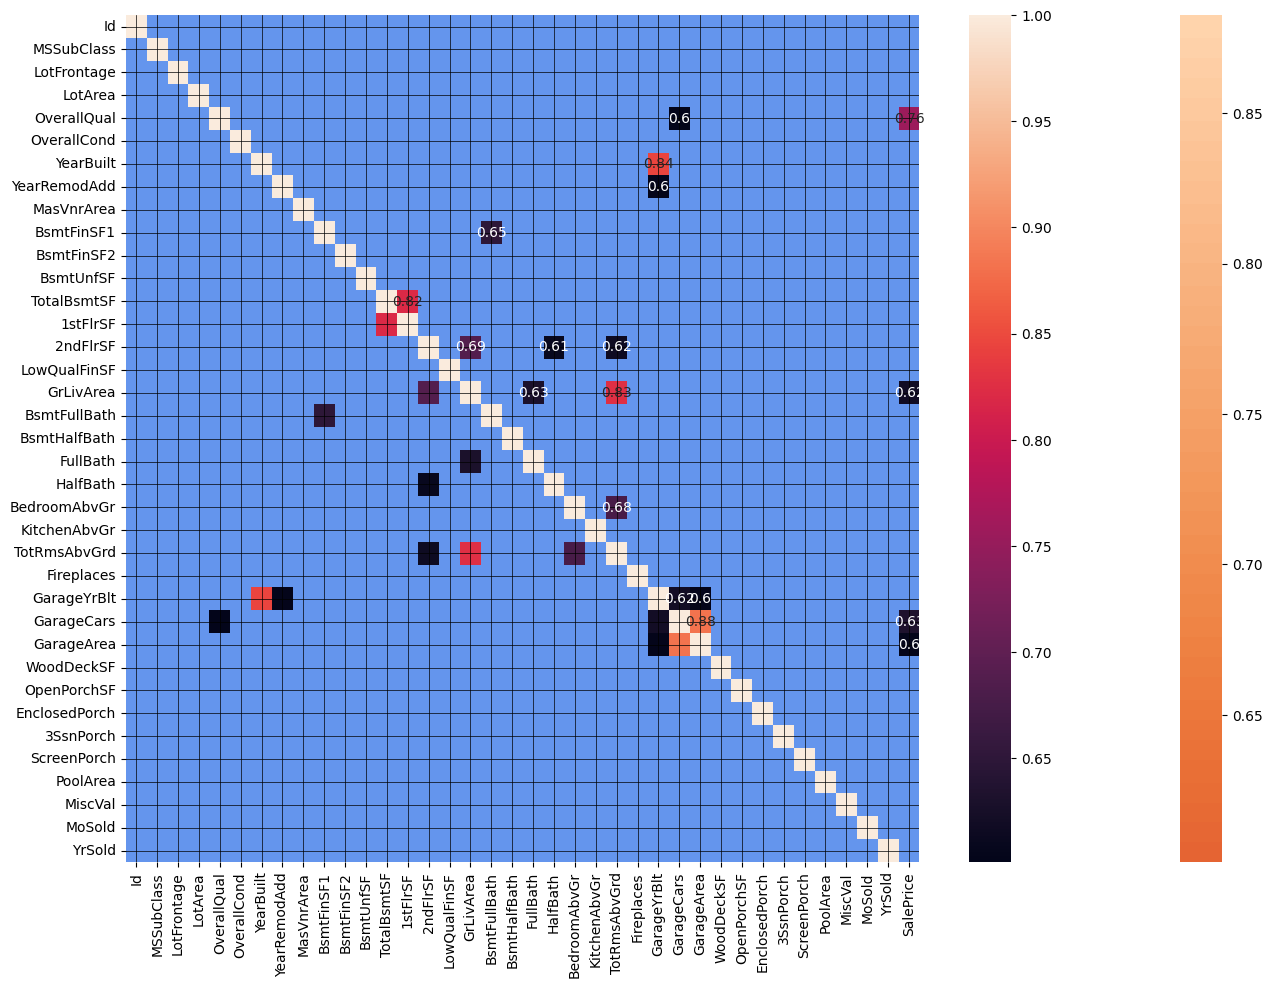

In [21]:

import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(16, 11))
corr_matrix = df.corr(numeric_only=True)
corr_matrix = corr_matrix[corr_matrix.abs() > 0.60]
corr_matrix = corr_matrix.drop('SalePrice')
mask = np.zeros_like(corr_matrix)
mask[np.tril_indices_from(mask)] = True
mask[(corr_matrix.abs() < 0.5) & (corr_matrix.abs() != 1)] = True

# Визуализация корреляционной матрицы с применением маски
sns.heatmap(corr_matrix, mask=mask, annot=True, center=0, ax=ax)
ax.set_facecolor('#6495ED')
ax.grid(visible=True, color='black', linewidth=0.5)
sns.heatmap(corr_matrix)


Сильных отрицательных корреляций не обнаружено. Положительные корреляции в основном очевидыные и представляют собой зависимости между площадью помещения, этажностью и комнатами.
Из интересных, пожалуй, только зависмость между качеством использованых материалов постройки и вместимостью гаража, а так же годом постройки гаража и его площадью. Вероятнее всего гаражи в более дорогих домах строятся на большее колличество машин. А более современные дома проектируются с большей площадью гаражей.

* Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.




<Axes: xlabel='YearBuilt', ylabel='Count'>

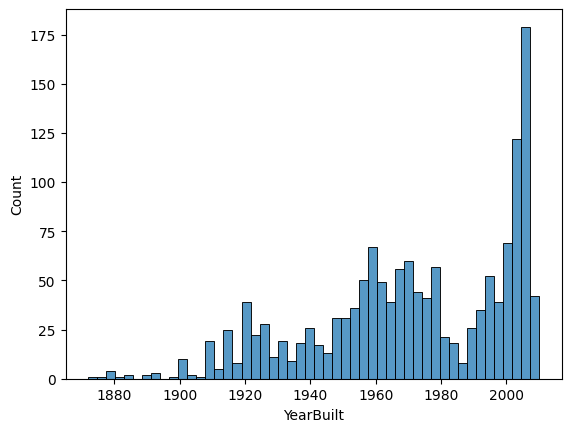

In [22]:
# Распределение недвижимости по году постройки

sns.histplot(df['YearBuilt'], bins=50)

В данных присутсвуеют старые. истоические постройки. Так же явно выделяется тренд на увеличение построек, с двумя просадками в годы "Великой дипрессии" и кризисов 90х

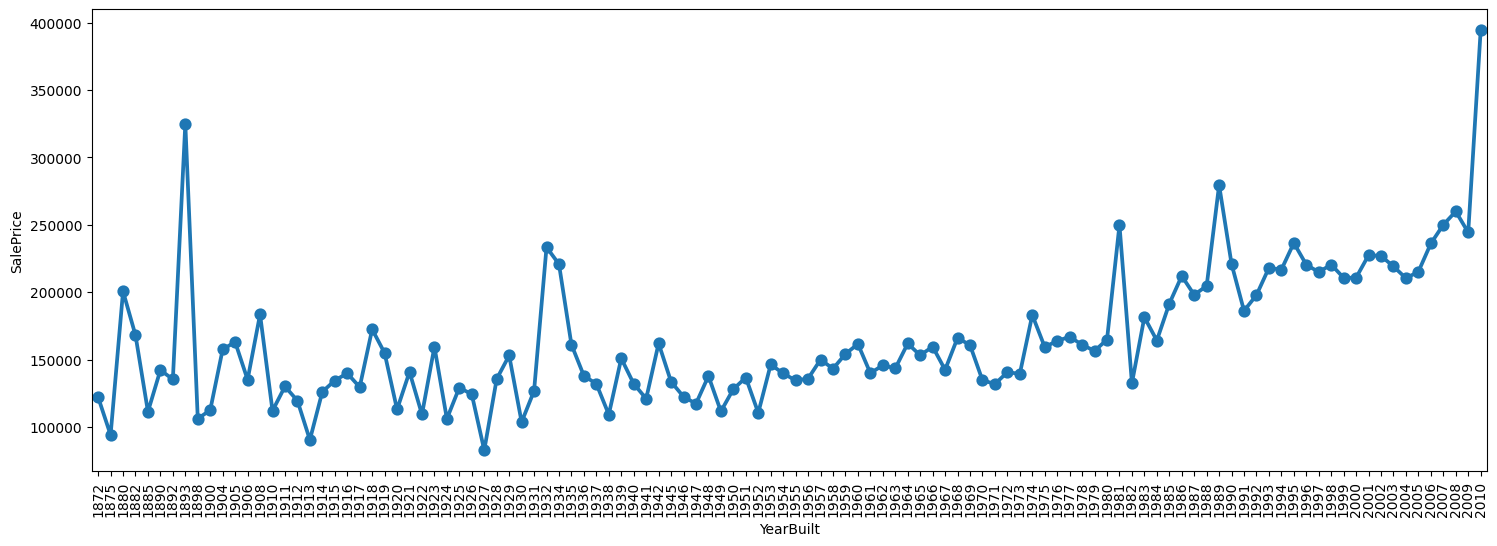

In [23]:
# РАсчет средней стоимости недвижимости по году постройки

grouped_year_df = df.groupby('YearBuilt')['SalePrice'].mean().reset_index()
fig = plt.figure(figsize=(18, 6))
sns.pointplot(x='YearBuilt', y='SalePrice', data=grouped_year_df)
plt.xticks(rotation = 90)
plt.show()

Здания, построенные до серилины прошлого века, в целом, хотя и имеют разброс, но остаются в некотором пределе, здесь не видно особой зависимости. Хотя есть два пика стоимсоти, вероятно это здания имеющие какое то историческое значение, возможно особняки тех лет постройки. С 50х годов прошлого века стоимсоть имеет явный тренд на увеличение из года в год. А в 2010 значительное увеичение стоимости недвижимости

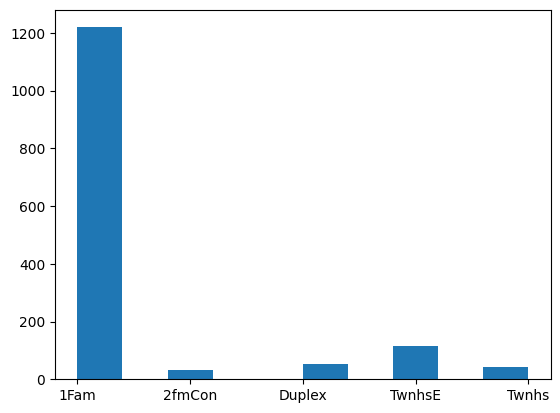

In [24]:
# Рассмотрим типы построек в датасете

plt.hist(df['BldgType'])
plt.show()


Значительная часть построе приходится на дома для проживания одной семьи

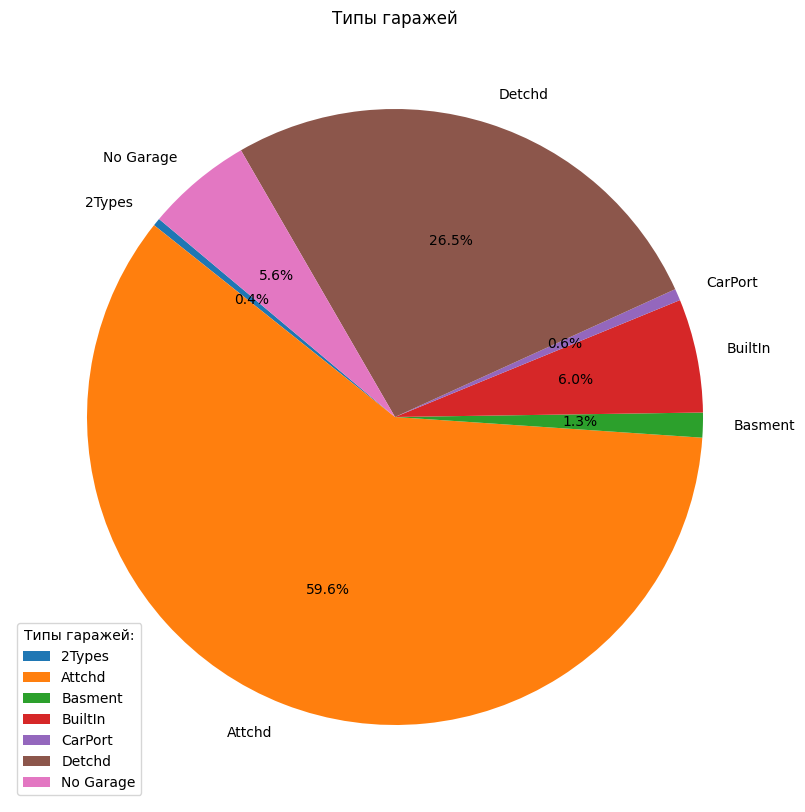

In [25]:
# Какие типы гаражей преобладают

garage_df = df.groupby('GarageType')['Id'].count()

plt.figure(figsize=(10, 10))
plt.pie(garage_df, labels=garage_df.index, autopct='%1.1f%%', startangle=140)
plt.title('Типы гаражей')
plt.legend(title='Типы гаражей:', loc="lower left")
plt.show()

### Выполните проектирование признаков путем реализации следующих преобразований: 
- Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. 


In [26]:
pd.set_option('display.max_columns', None)
df.select_dtypes(include=['category', 'object']).head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [27]:
# Выделим категориальные переменные, которые являются ординальными (имеющими порядок)

from sklearn.preprocessing import LabelEncoder

ordinal_features = df[    ['LotShape', 'LandSlope', 'ExterQual', 
                'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 
                'GarageFinish', 'GarageQual', 'GarageCond']  ]

display(ordinal_features.head())

# Преобразование категориальных ординальных признаков в числовые
le = LabelEncoder()

for feature in ordinal_features:
    df[feature] = le.fit_transform(df[feature])


df[    ['LotShape', 'LandSlope', 'ExterQual', 
                'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 
                'GarageFinish', 'GarageQual', 'GarageCond']  ].head()


,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond
0,Reg,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,Typ,RFn,TA,TA
1,Reg,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,Typ,RFn,TA,TA
2,IR1,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,Typ,RFn,TA,TA
3,IR1,Gtl,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Typ,Unf,TA,TA
4,IR1,Gtl,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,Typ,RFn,TA,TA


,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond
0,3,0,2,4,2,3,3,2,5,0,2,6,2,5,5
1,3,0,3,4,2,3,1,0,5,0,3,6,2,5,5
2,0,0,2,4,2,3,2,2,5,0,2,6,2,5,5
3,0,0,3,4,3,1,3,0,5,2,2,6,3,5,5
4,0,0,2,4,2,3,0,2,5,0,2,6,2,5,5


In [28]:
# Выделин номинальные признаки

nominal_featuters = df[['MSZoning', 'Street', 'LandContour', 'Utilities', 
                        'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                        'Foundation', 'Heating', 'CentralAir', 'Electrical', 
                        'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']]
# nominal_featuters_list = nominal_featuters.columns.tolist()

display(nominal_featuters.head())


# Преобразование номинальных признаков в числовые

for feature in nominal_featuters:
    df = pd.get_dummies(df, columns=[feature], prefix=f'{feature}', drop_first=True)


df.head()

,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Foundation,Heating,CentralAir,Electrical,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,Y,SBrkr,Attchd,Y,WD,Normal
1,RL,Pave,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,CBlock,GasA,Y,SBrkr,Attchd,Y,WD,Normal
2,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,Y,SBrkr,Attchd,Y,WD,Normal
3,RL,Pave,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,BrkTil,GasA,Y,SBrkr,Detchd,Y,WD,Abnorml
4,RL,Pave,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,Y,SBrkr,Attchd,Y,WD,Normal


,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,3,0,7,5,2003,2003,196.0,2,4,2,3,3,2,706,5,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2003,2,2,548,5,5,0,61,0,0,0,0,0,2,2008,208500,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,Fal

In [29]:
# Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

df.to_csv('cleaned_house_prices.csv', index=False)

